In [14]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from scipy import interpolate
from sklearn import metrics
import pickle

import sys
from os.path import dirname, abspath
import os
sys.path.append(dirname(dirname(abspath('__file__')))+'/Utils')

from read_answers import ReadAnswers

%matplotlib notebook

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [50]:
## Input the filenames and parameters:
filename = 'AmsData_hoge_corrected_int_all.pkl'
original_indices = 'orig_x.npy'
full_indices = 'full_time_index.npy'
filename_answers = 'hoge_segm_lines_31052020.txt' # 'answers_Ada_01.txt' # 
interpolation_method = 'original_NaN'

In [51]:
## Create variables with directories to external files:
directory = os.path.join(dirname(os.getcwd()), 'Data_files/')
file_data = os.path.join(directory, filename)
file_full_indices = os.path.join(directory, full_indices)
file_orig_indices = os.path.join(directory, original_indices)
file_answers = os.path.join(directory, filename_answers)

In [54]:
## Import the measurements:
data_imported = pd.read_pickle(file_data)
mydata = data_imported[interpolation_method].copy()

## Load and calculate x-axis index:
orig_x = np.load(file_orig_indices)
full_x = np.load(file_full_indices) 
indices = [int(i*365.25/11) for i in orig_x]

## Load the answers (ground truth):
answers = ReadAnswers(file_answers)
ans = pd.DataFrame(answers['segm_lines'], index = answers.index)
ans.columns = ['segm_lines']

for i, vals in enumerate(ans.segm_lines):
    ans.segm_lines.loc[ans.index[i]] = [indices[j] for j in vals]

In [33]:
for idx, val in enumerate(orig_x):
    print(idx, val)

0 0.0
1 0.03011824324324324
2 0.06023648648648648
3 0.09035472972972972
4 0.12047297297297296
5 0.1505912162162162
6 0.18070945945945943
7 0.21082770270270268
8 0.24094594594594593
9 0.2710641891891892
10 0.33130067567567567
11 0.36141891891891886
12 0.3915371621621621
13 0.42165540540540536
14 0.4517736486486486
15 0.48189189189189185
16 0.512010135135135
17 0.5421283783783784
18 0.5722466216216215
19 0.6023648648648648
20 0.632483108108108
21 0.6626013513513513
22 0.6927195945945945
23 0.7228378378378377
24 0.752956081081081
25 0.7830743243243242
26 0.8131925675675675
27 0.8433108108108107
28 0.9035472972972972
29 0.9637837837837837
30 0.9939020270270269
31 1.02402027027027
32 1.0541385135135135
33 1.0842567567567567
34 1.114375
35 1.144493243243243
36 1.1746114864864865
37 1.2950844594594593
38 1.3553209459459459
39 1.385439189189189
40 1.4155574324324323
41 1.4456756756756755
42 1.4757939189189189
43 1.505912162162162
44 1.5360304054054053
45 1.5661486486486484
46 1.596266891891891

In [ ]:
for i in range(9,10): #range(len(ans)):
    ts_num = ans.index[i]
    plt.figure(figsize=(15,8))
    ax = plt.gca()
    ax.grid(True)
#     ax.grid(color="whitesmoke")
    ax.set_axisbelow(True)
    ax.plot(mydata.columns, mydata.iloc[ts_num], '-o', markersize=3, linewidth=1, color='#D0D0D0', markerfacecolor='C0', markeredgecolor='C0')
    ax.scatter(mydata.columns, mydata.iloc[ts_num].T + 18.1, s=9,
                c="wheat")
    ax.scatter(mydata.columns, mydata.iloc[ts_num].T - 18.1, s=9,
                c="lightblue")
    for j in ans.segm_lines.iloc[i]:
        plt.axvline(mydata.columns[j], color='red')
    plt.title('Time-series '+ str(ts_num))
    plt.show()

<IPython.core.display.Javascript object>


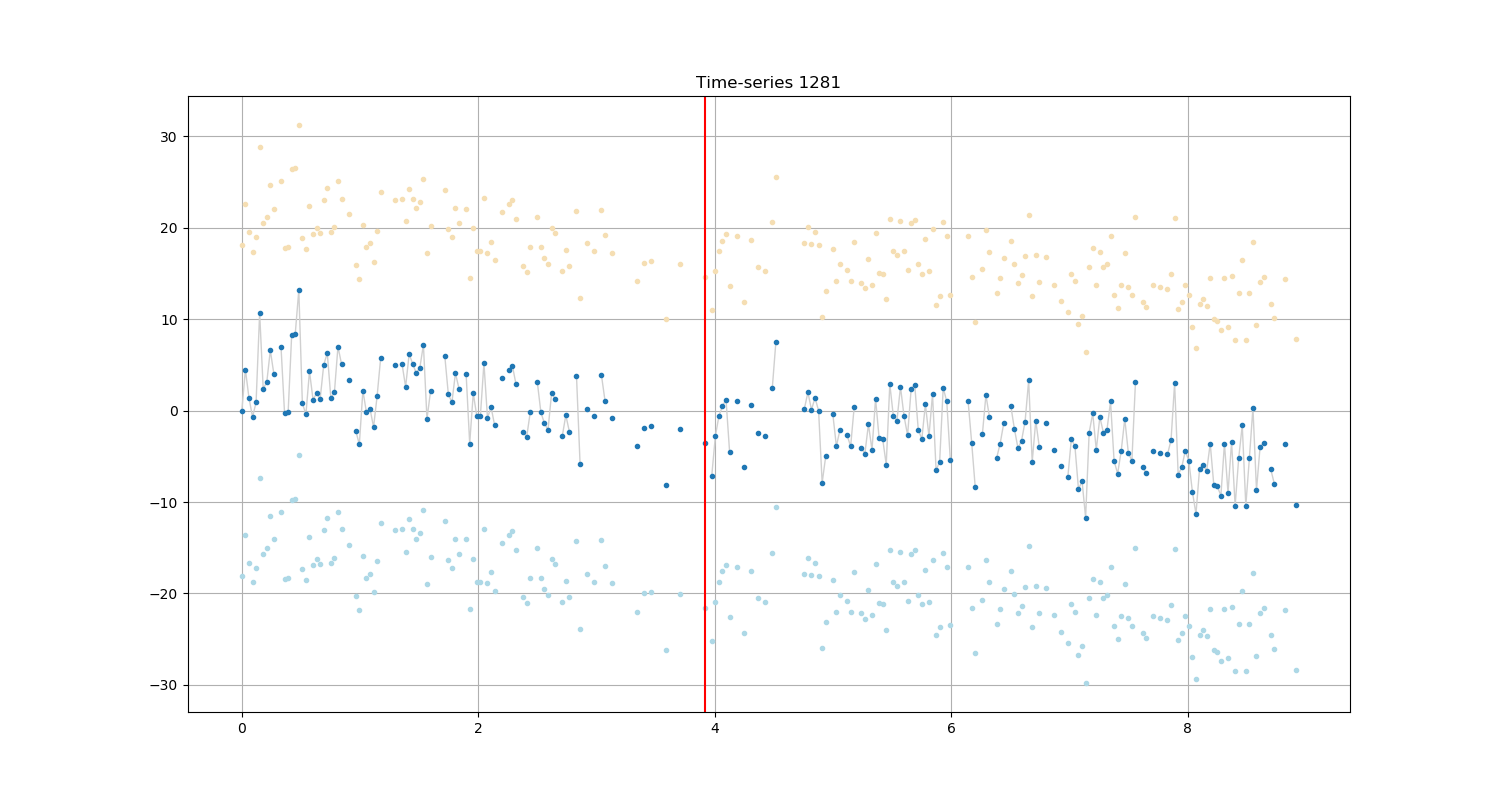

<IPython.core.display.Javascript object>


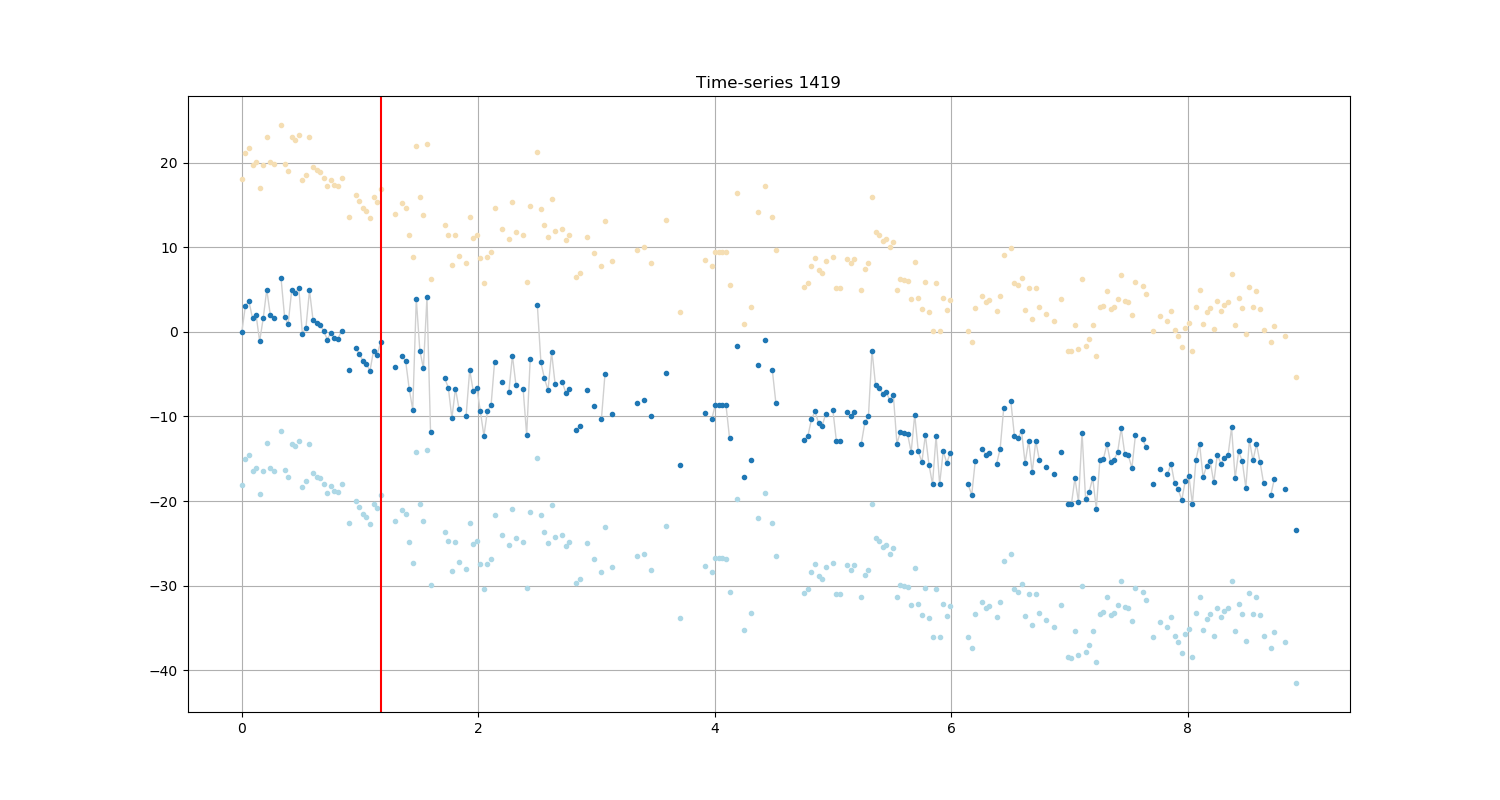

<IPython.core.display.Javascript object>


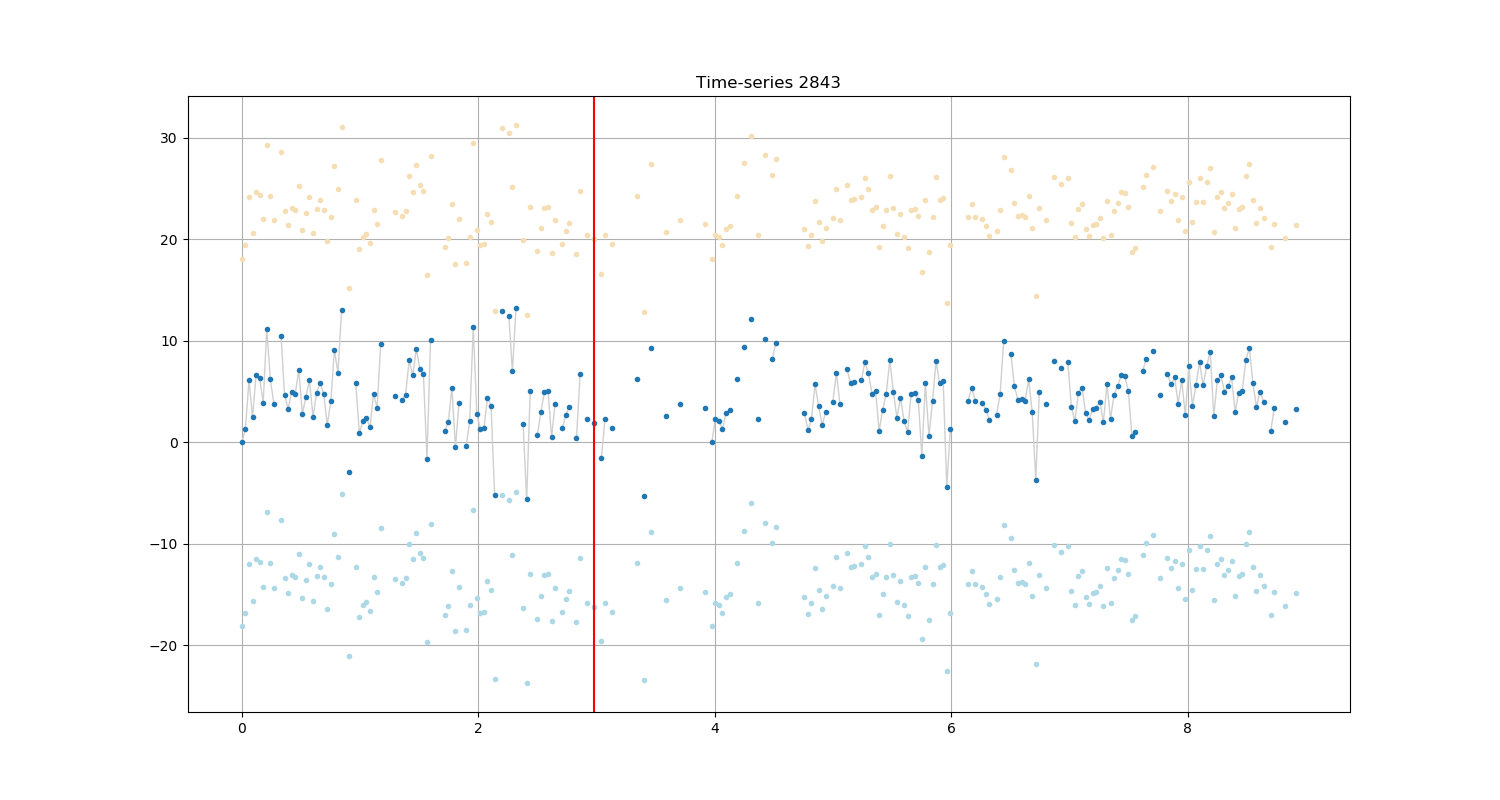

<IPython.core.display.Javascript object>


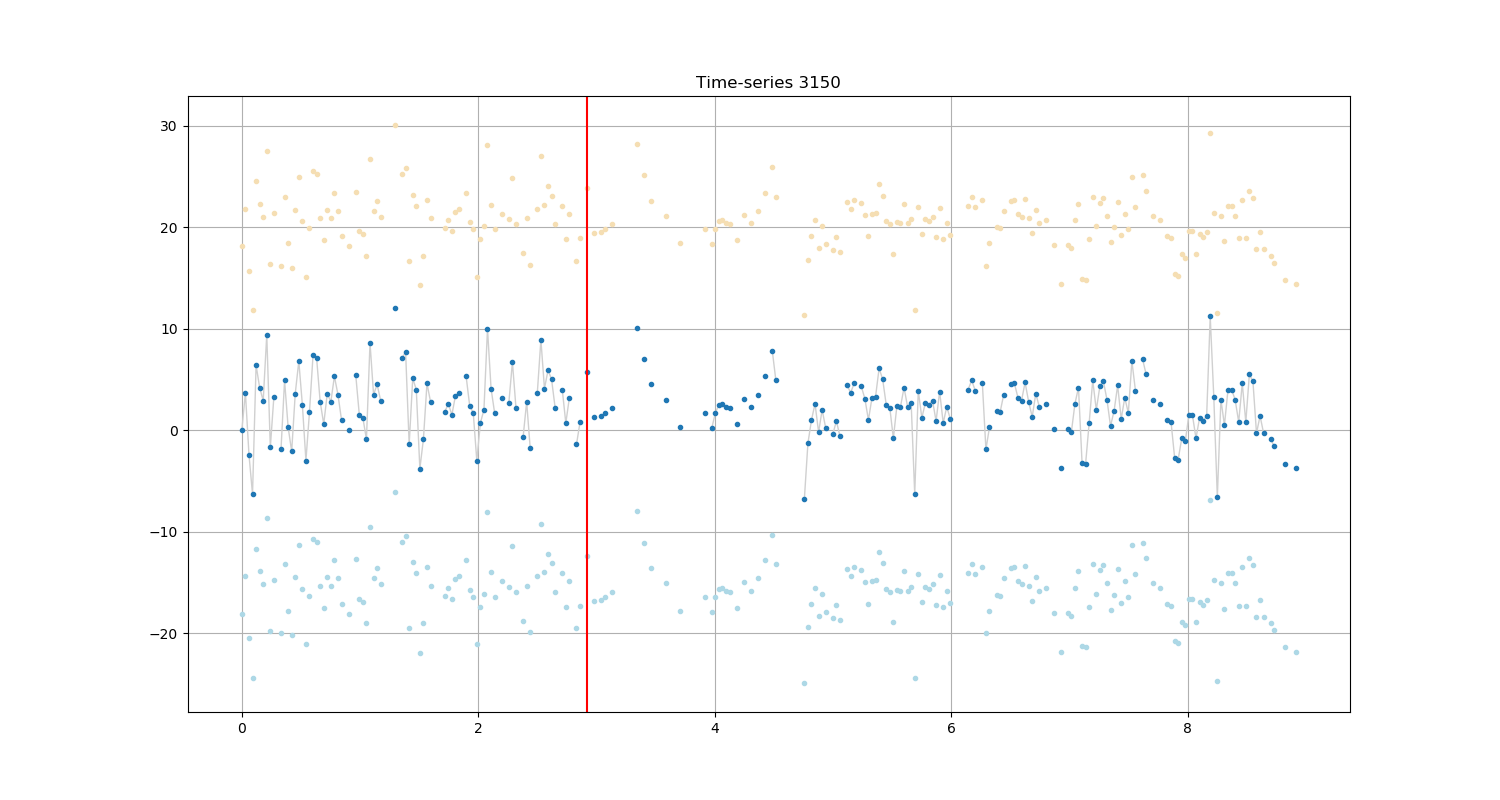

<IPython.core.display.Javascript object>


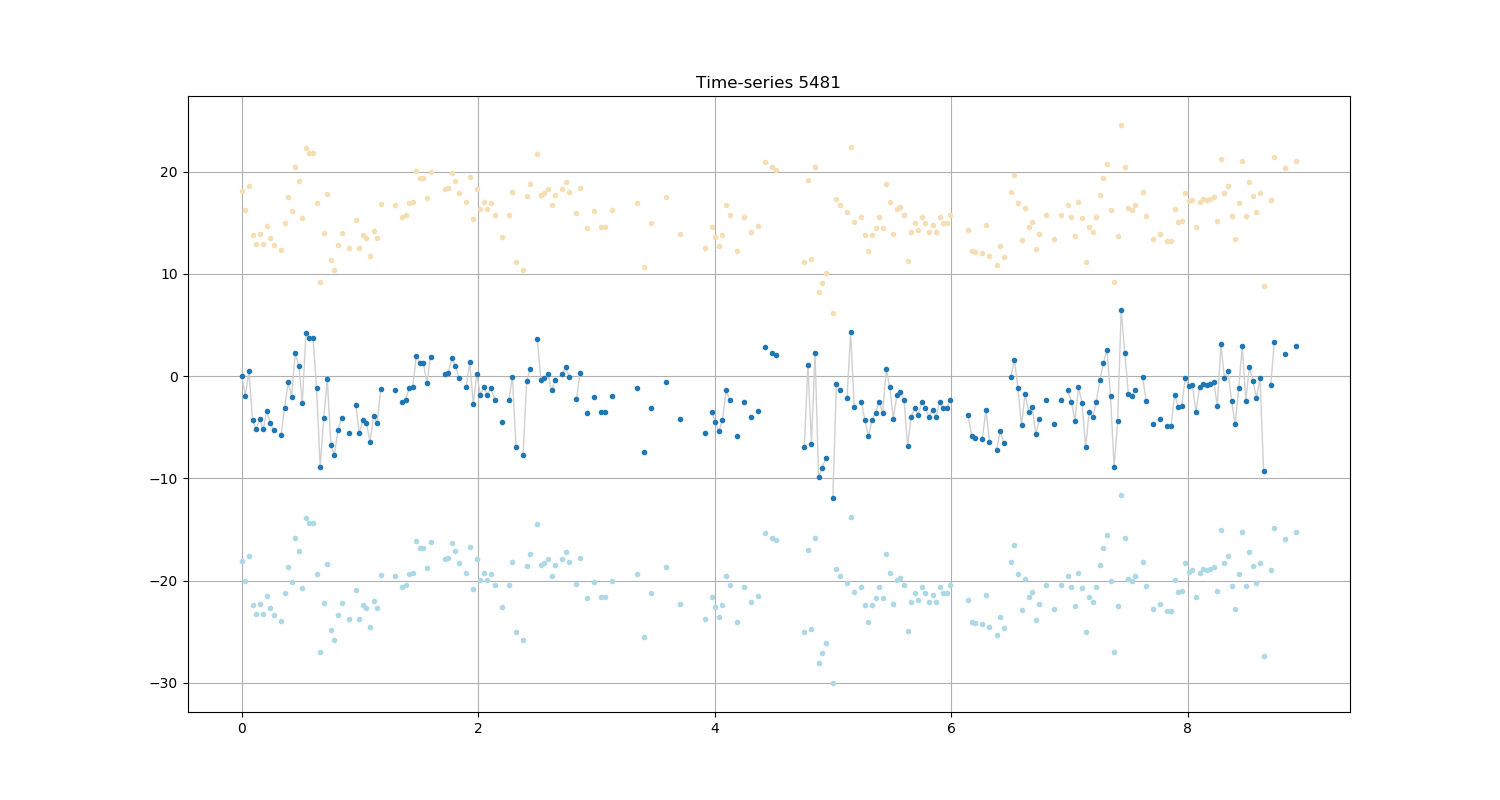

<IPython.core.display.Javascript object>


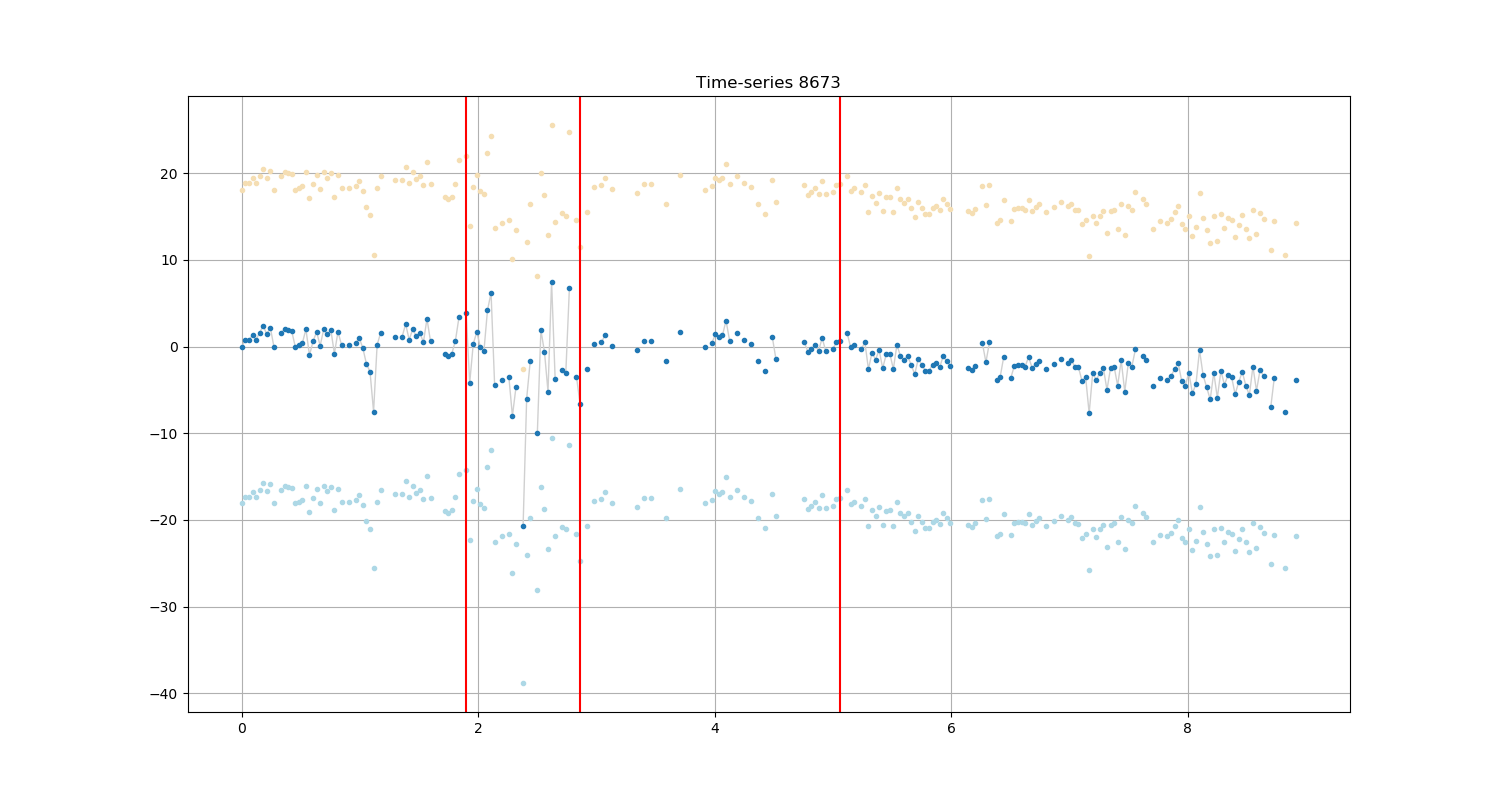

<IPython.core.display.Javascript object>


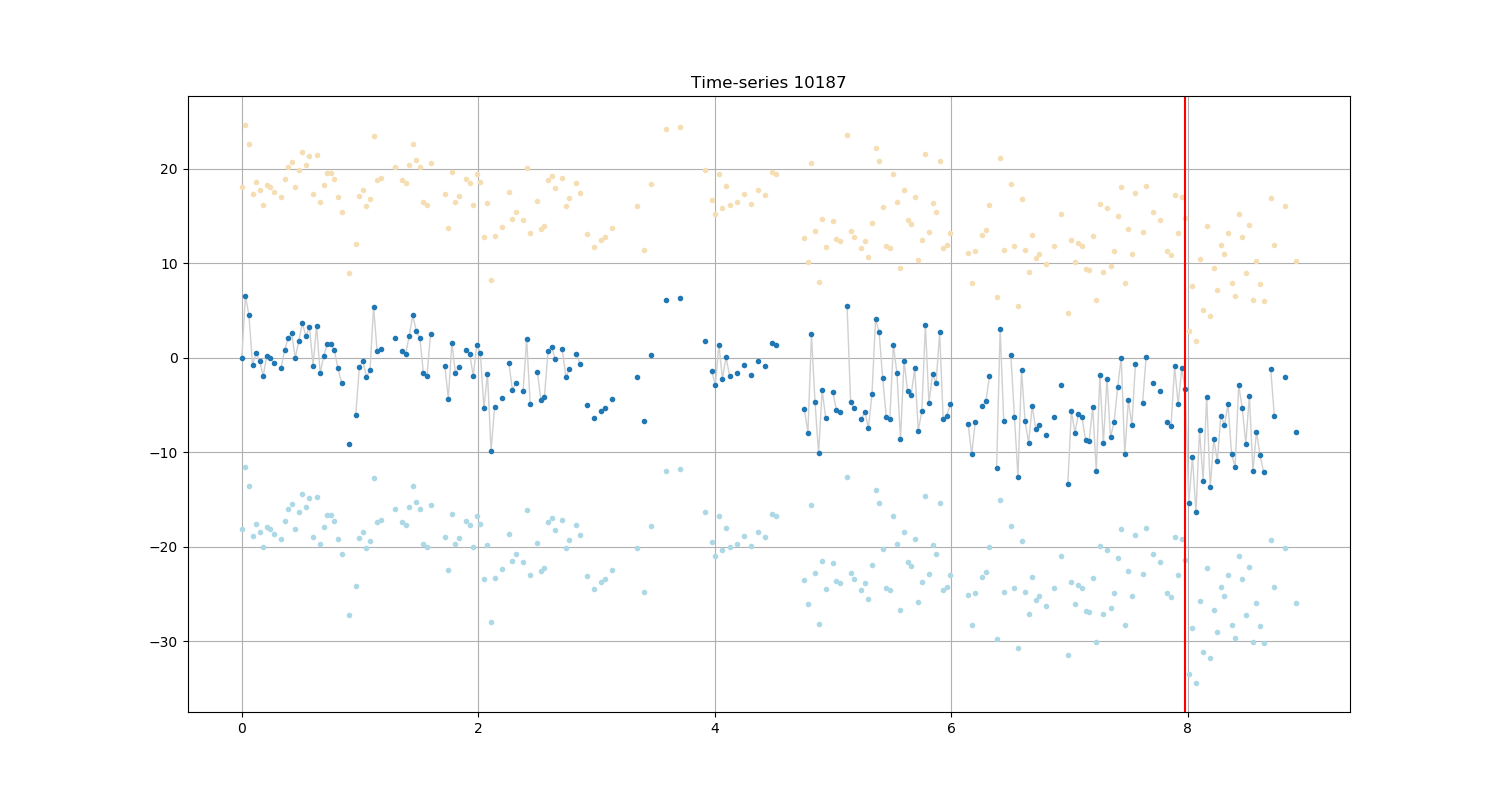

<IPython.core.display.Javascript object>


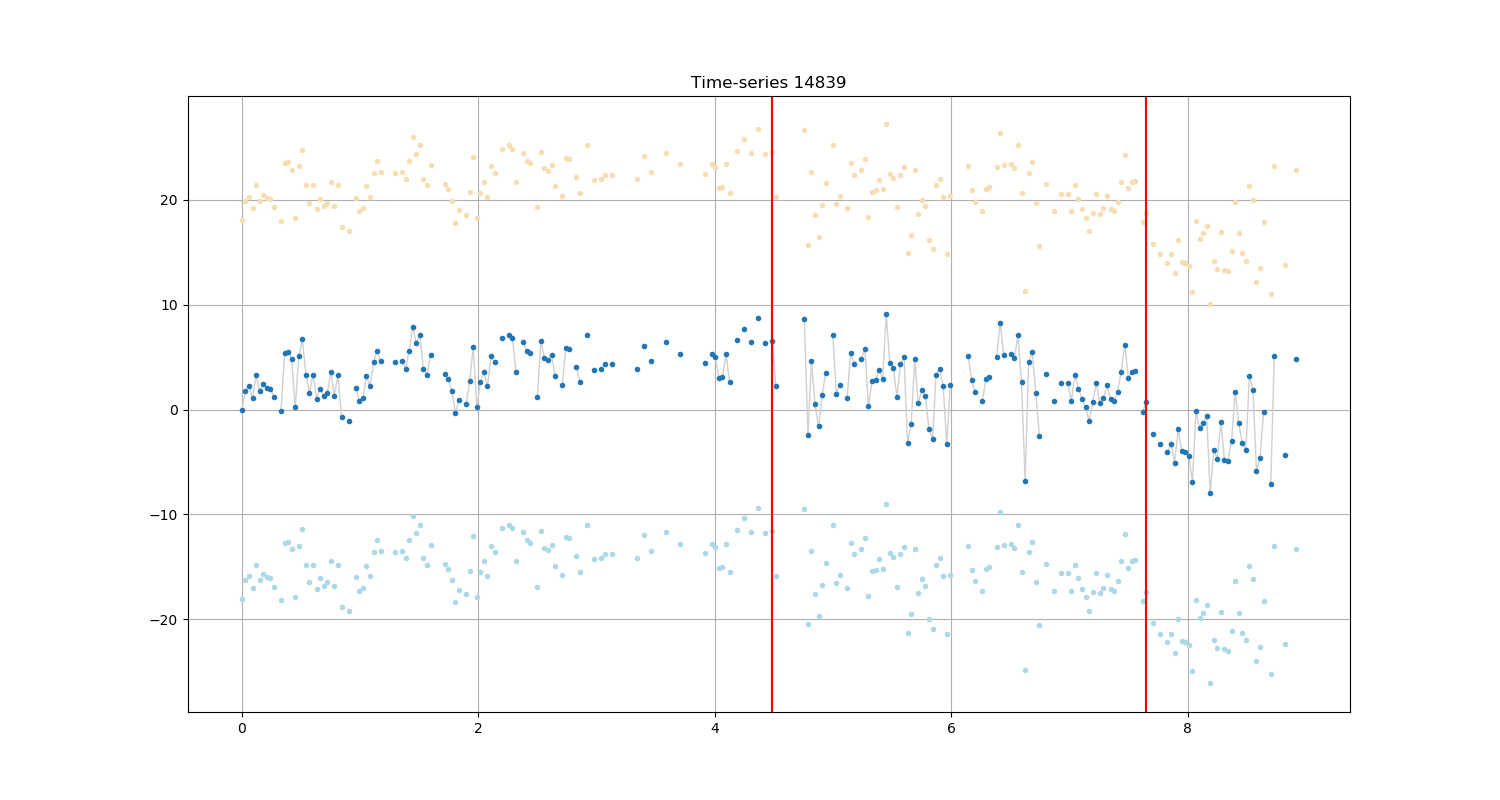

In [55]:
for i in [1281, 1419, 2843, 3150, 5481, 8673, 10187, 14839]: #range(len(ans)):
    ts_num = i #ans.index[i]
    plt.figure(figsize=(15,8))
    ax = plt.gca()
    ax.grid(True)
#     ax.grid(color="whitesmoke")
    ax.set_axisbelow(True)
    ax.plot(full_x, mydata.iloc[ts_num], '-o', markersize=3, linewidth=1, color='#D0D0D0', markerfacecolor='C0', markeredgecolor='C0')
    ax.scatter(full_x, mydata.iloc[ts_num].T + 18.1, s=9,
                c="wheat")
    ax.scatter(full_x, mydata.iloc[ts_num].T - 18.1, s=9,
                c="lightblue")
    for j in ans.segm_lines.loc[i]:
        plt.axvline(full_x[j], color='red')
    plt.title('Time-series '+ str(ts_num))
    plt.show()